In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../raw_data/preprocessed_data.csv", index_col=0)

df.head()

,description,points,price,province,title,winery,variety_adj,type,region
country,,,,,,,,,
Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,portuguese red,red,Douro
US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,pinot gris,white,Willamette Valley
US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,riesling,white,Lake Michigan Shore
US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,pinot noir,red,Willamette Valley
Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tandem,tempranillo-merlot,red,Navarra


In [114]:
X=df.drop(columns=['description','title'])
X.reset_index(inplace=True)

In [115]:
X

,country,points,price,province,winery,variety_adj,type,region
0,Portugal,87,15.0,Douro,Quinta dos Avidagos,portuguese red,red,Douro
1,US,87,14.0,Oregon,Rainstorm,pinot gris,white,Willamette Valley
2,US,87,13.0,Michigan,St. Julian,riesling,white,Lake Michigan Shore
3,US,87,65.0,Oregon,Sweet Cheeks,pinot noir,red,Willamette Valley
4,Spain,87,15.0,Northern Spain,Tandem,tempranillo-merlot,red,Navarra
...,...,...,...,...,...,...,...,...
111529,Germany,90,28.0,Mosel,Dr. H. Thanisch (Erben MÃ¼ller-Burggraef),riesling,white,Mosel
111530,US,90,75.0,Oregon,Citation,pinot noir,red,Oregon
111531,France,90,30.0,Alsace,Domaine Gresser,gewurztraminer,white,Alsace
111532,France,90,32.0,Alsace,Domaine Marcel Deiss,pinot gris,white,Alsace


In [116]:
label_encoder_country = LabelEncoder()
label_encoder_province = LabelEncoder()
label_encoder_winery = LabelEncoder()
label_encoder_variety = LabelEncoder()
label_encoder_region = LabelEncoder()
one_hot_encoder_type = OneHotEncoder(sparse=False)

X['country'] = label_encoder_country.fit_transform(X['country'])
X['province'] = label_encoder_province.fit_transform(X['province'])
X['winery'] = label_encoder_winery.fit_transform(X['winery'])
X['variety_adj'] = label_encoder_variety.fit_transform(X['variety_adj'])
X['region'] = label_encoder_region.fit_transform(X['region'])

type_encoded = one_hot_encoder_type.fit_transform(X[['type']])
type_categories = one_hot_encoder_type.get_feature_names_out(['type'])
type_encoded=pd.DataFrame(type_encoded)
X[type_categories] = type_encoded
X.drop(columns=['type'], inplace=True)
X

/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,country,points,price,province,winery,variety_adj,region,type_red,type_rosé,type_sparkling,type_white
0,30,87,15.0,106,12188,441,486,1.0,0.0,0.0,0.0
1,39,87,14.0,265,12248,427,1554,0.0,0.0,0.0,1.0
2,39,87,13.0,215,13564,470,696,0.0,0.0,0.0,1.0
3,39,87,65.0,265,13788,431,1554,1.0,0.0,0.0,0.0
4,36,87,15.0,259,13868,578,955,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
111529,16,90,28.0,229,6125,470,882,0.0,0.0,0.0,1.0
111530,39,90,75.0,265,4411,431,999,1.0,0.0,0.0,0.0
111531,14,90,30.0,11,5493,205,32,0.0,0.0,0.0,1.0
111532,14,90,32.0,11,5579,427,32,0.0,0.0,0.0,1.0


In [98]:
neigh = NearestNeighbors(n_neighbors=200, algorithm='ball_tree', n_jobs=-1)

In [117]:
scaler = RobustScaler()
X_scaled=scaler.fit_transform(X)

In [118]:
features_weights=[1,3,3,1,2,3,1,3,3,3,3]
X_scaled=X_scaled*features_weights
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
neigh.fit(X_scaled)

NearestNeighbors(algorithm='ball_tree', n_jobs=-1, n_neighbors=200)

In [100]:
X_test=X.sample(5)
df.iloc[X_test.index]

,description,points,price,province,title,winery,variety_adj,type,region
country,,,,,,,,,
US,This medium-bodied Pinot Noir shows tasty vari...,93,65.0,California,FEL 2012 Ferrrington Vineyard Pinot Noir (Ande...,FEL,pinot noir,red,Anderson Valley
US,"A very dry and firmly tannic wine, this doesn'...",85,75.0,California,Vellum 2012 Black Petit Verdot (Suisun Valley),Vellum,petit verdot,red,Suisun Valley
US,"Ripe, tannic and leathery (in a good sense), t...",92,75.0,Oregon,The Four Graces 2012 Black Family Estate Pinot...,The Four Graces,pinot noir,red,Dundee Hills
Italy,"A blend of 70% Sangiovese, 15% Sagrantino and ...",93,20.0,Central Italy,Milziade Antano 2012 Montefalco Rosso,Milziade Antano,red blend,red,Montefalco Rosso
France,"With stalky fruit and black currant acidity, t...",87,20.0,Bordeaux,ChÃ¢teau le Gardera 2009 Bordeaux SupÃ©rieur,ChÃ¢teau le Gardera,bordeaux-style red blend,red,Bordeaux SupÃ©rieur


In [128]:
# X_test=[X.iloc[23238]] #Kilikanoon Oracle Shiraz
X_test=[X_scaled.iloc[65178]] #Grosset 2002 Polish Hill Riesling (Clare Valley) 91pts $30
X.iloc[65178]

country              2.0
points              91.0
price               30.0
province           335.0
winery            7601.0
variety_adj        470.0
region             298.0
type_red             0.0
type_rosé            0.0
type_sparkling       0.0
type_white           1.0
Name: 65178, dtype: float64

In [125]:
distance, indices = neigh.kneighbors(X_test)
df.iloc[indices[0]]

/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,description,points,price,province,title,winery,variety_adj,type,region
country,,,,,,,,,
Australia,"Whether you ask me, God, or the lamp post, any...",91,30.0,South Australia,Grosset 2002 Polish Hill Riesling (Clare Valley),Grosset,riesling,white,Clare Valley
Australia,"Lean and tightly focused, this looks like one ...",91,35.0,South Australia,Kilikanoon 2011 Mort's Reserve Watervale Riesl...,Kilikanoon,riesling,white,Clare Valley
Australia,"Classic Clare Valley notes of blossoms, lime p...",91,35.0,South Australia,Kilikanoon 2016 Mort's Reserve Riesling (Clare...,Kilikanoon,riesling,white,Clare Valley
Australia,Dry Riesling of this quality is capable of agi...,92,30.0,South Australia,Kilikanoon 2015 Mort's Reserve Riesling (Clare...,Kilikanoon,riesling,white,Clare Valley
Australia,Marked by struck flint and petrol notes on the...,91,35.0,Western Australia,Frankland Estate 2014 Netley Road Vineyard Rie...,Frankland Estate,riesling,white,Frankland River
...,...,...,...,...,...,...,...,...,...
Italy,Premstaler Sauvignon shows wonderful balance a...,90,24.0,Northeastern Italy,Kellerei Kaltern Caldaro 2010 Premstaler Sauvi...,Kellerei Kaltern Caldaro,sauvignon,white,Alto Adige
Germany,Pink grapefruit and peach nectar flood the pal...,91,24.0,Rheingau,Johannishof 2014 Johannisberg V Kabinett Riesl...,Johannishof,riesling,white,Rheingau
Germany,A whiff of lanolin is a harbinger of maturity ...,92,28.0,Rheingau,Domdechant Werner 2012 Hochheimer Kabinett Rie...,Domdechant Werner,riesling,white,Rheingau


In [126]:
df.iloc[indices[0]]['type'].value_counts()

type
white    200
Name: count, dtype: int64

(0.0, 100.0)

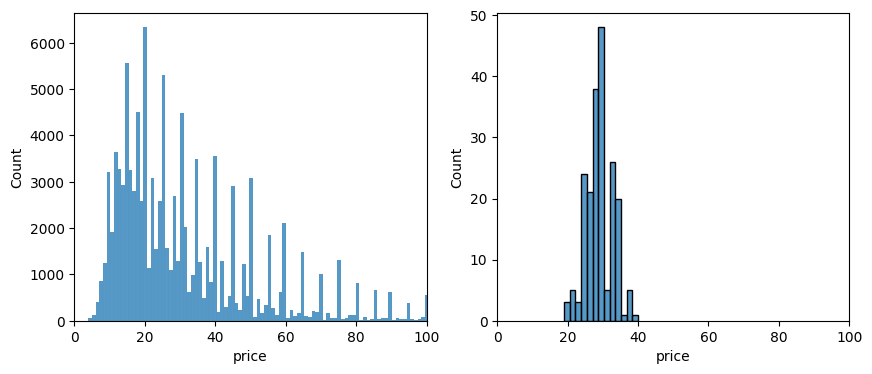

In [127]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.histplot(X['price'], ax=axes[0])
axes[0].set_xlim(0,100)
sns.histplot(df.iloc[indices[0]]['price'], ax=axes[1])
axes[1].set_xlim(0,100)

(80.0, 100.0)

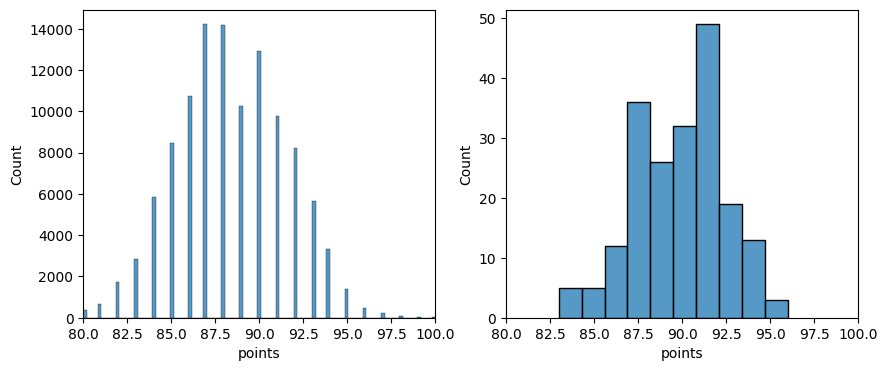

In [123]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.histplot(X['points'], ax=axes[0])
axes[0].set_xlim(80,100)
sns.histplot(df.iloc[indices[0]]['points'], ax=axes[1])
axes[1].set_xlim(80,100)